# Prueba Intertrimestral

**Nombre:**

**Apellidos:**

**Tiempo de la prueba: 2 Horas**

**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos

**Fecha:** 18 de octubre de 2023

**Instrucciones:**

- Escribe código limpio y autoexplicativo.

- Se eliminará 0.5 puntos por usar Seaborn o Matplotlib.

- Se pueden utilizar los materiales de clase.

- Se puede utilizar internet para búsqueda de dudas y documentación.

- No se puede utilizar ningún tipo de LLM.

- No se puede utilizar mensajería instantánea.

- Sube tus resultados a tu repositorio de Github.

- Imprime una versión en PDF en A3 y Portrait del notebook.

- Envialo tus resultados a dmartincorral@icai.comillas.edu adjuntando el PDF y la url del notebook subido al repositorio de Github.


## Inicialización de librerías

Carga aquí todas las librerías que vayas a utilizar.

In [73]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn import preprocessing
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

## Ejercicio 1 (2 puntos):

a) Crea una función que calcule y devuelva el factorial de un número entero. **(0.6 puntos)**

b) Crea una función que verifique si un número es primo o no. **(0.6 puntos)**

c) Muestra en un dataframe los 50 primeros números positivos, si es primo y su factorial utilizando las funciones anteriores. **(0.6 puntos)**

d) ¿Cómo se podría programar en una clase las tres operaciones anteriores? **(0.2 puntos)**

In [17]:
def factorial_value(n):
    return np.math.factorial(n)

In [18]:
# If given number is greater than 1
def is_prime(num):
    if num > 1:
        # Iterate from 2 to n / 2
        for i in range(2, int(num/2)+1):
            # If num is divisible by any number between
            # 2 and n / 2, it is not prime
            if (num % i) == 0:
                return False
                break
        else:
            return True
    else:
        return False

In [26]:
numbers = np.linspace(1, 50, num=50)
factor_vector = np.zeros(len(numbers))
is_prime_vector = np.zeros(len(numbers))

count = -1
for i in numbers:
    count=count + 1
    factor_vector[count] = factorial_value(i)
    is_prime_vector[count] = is_prime(i)
    
output_df = pd.DataFrame()
output_df["number"] = list(numbers)
output_df["factor"] = list(factor_vector)
output_df["is_prime"] = list(is_prime_vector)

output_df

C:\Users\ignac\AppData\Local\Temp/ipykernel_6840/67490110.py:2: DeprecationWarning: Using factorial() with floats is deprecated
  return np.math.factorial(n)


,number,factor,is_prime
0,1.0,1.000000e+00,0.0
1,2.0,2.000000e+00,1.0
2,3.0,6.000000e+00,1.0
3,4.0,2.400000e+01,0.0
4,5.0,1.200000e+02,1.0
5,6.0,7.200000e+02,0.0
6,7.0,5.040000e+03,1.0
7,8.0,4.032000e+04,0.0
8,9.0,3.628800e+05,0.0
9,10.0,3.628800e+06,0.0


Para definir la clase en primer lugar creamos un objeto "class" donde se establece el nombre de la clase.
Definimoos dentro de la clase un método _init_ para definir como se crea el objeto. Podríamos establecer como input el número de elementos del dataframe, que sería sobre el cual se hacen los primeras dos operaciones.
Y luego para cada operación descrita se definiría otro método recilcando el código descrito. 

## Ejercicio 2 (4 puntos):

a) Extrae de sklearn el conjunto de datos __California Housing dataset__
 y transfórmalo a dataframe de pandas **(0.25 puntos)**

b) Construye una función que muestra la estructura del dataset, el número de NAs, tipos de variables y estadísticas básicas de cada una de las variables. **(0.5 puntos)**

c) Construye una __Regresión lineal__ y un __Random forest__ que predigan el __Median house value__ según los datos disponibles. **(0.75 puntos)**

d) Visualiza cuales son las variables (coeficientes) más importantes en cada uno de los modelos. **(1.25 puntos)**

e) Decide a través de las métricas que consideres oportunas, cuál de los dos modelos es mejor, por qué y explica el proceso que has realizado para responder en los puntos anteriores. **(1.25 puntos)**

In [95]:
dataset = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names']) #Pasamos a dataFrame
df["target"] = dataset["target"] #Añadimos la variable objetivo
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [109]:
def df_description(df):
    NA_values = list(df.isna().sum())
    df_metrics = df.describe()
    df_metrics.loc[-1] = NA_values  # adding a row
    return df_metrics
#Last row includes the NA
df_description(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010
-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
df_norm = pd.DataFrame(preprocessing.normalize(df))
df_norm.columns = df.columns



X = df_norm.loc[:, df_norm.columns != "target"].copy()
y = df_norm["target"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

reg = LinearRegression()
reg.fit(X_train,y_train)

regr = RandomForestRegressor(max_depth=X.shape[1], random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, random_state=0)

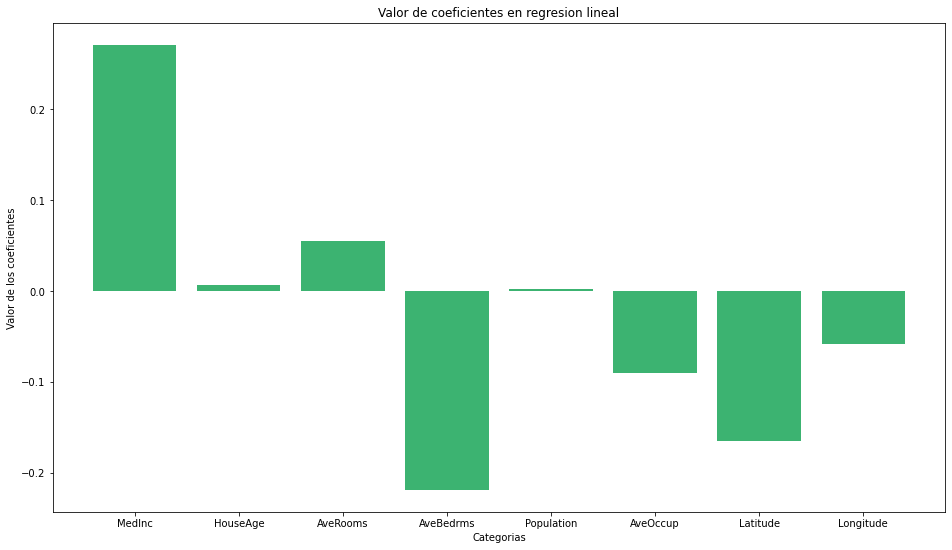

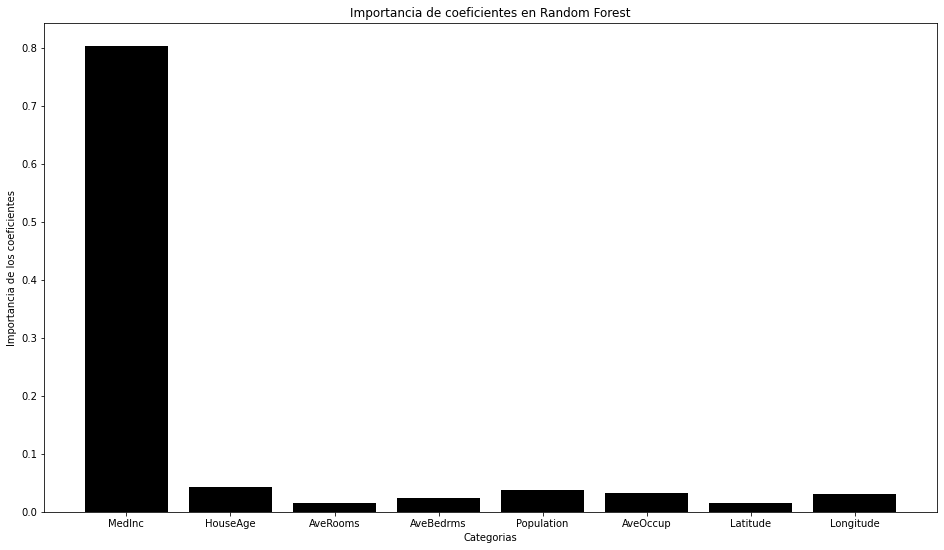

In [94]:
linear_regression_coeficients = reg.coef_
random_forest_importance_variables = regr.feature_importances_
variables = df.columns

visual_df = pd.DataFrame()
visual_df["variables"] = list(variables[0:8])
visual_df["linear_regression_coeficients"] = list(linear_regression_coeficients)
visual_df["random_forest_importance_variables"] = list(random_forest_importance_variables)

plt.figure(figsize = (16,9))
plt.bar(visual_df["variables"],visual_df["linear_regression_coeficients"],color = "mediumseagreen")
plt.xlabel("Categorias")
plt.ylabel("Valor de los coeficientes")
plt.title("Valor de coeficientes en regresion lineal")
plt.show()

plt.figure(figsize = (16,9))
plt.bar(visual_df["variables"],visual_df["random_forest_importance_variables"],color = "black")
plt.xlabel("Categorias")
plt.ylabel("Importancia de los coeficientes")
plt.title("Importancia de coeficientes en Random Forest")
plt.show()

En las visualizaciones anteriores. En el caso de la regresión lineal; como las variables han sido normalizadas, el valor absoluto de los coeficientes nos indica su importancia. Entre ellos MedInc es el más importante, pero no mucho más lejos que otras variables como averageRooms.
Por otra parte, en el caso del random forest; la visualización muestra la importancia de cada una de las variables usando una métrica propia del modelo. En este caso podemos observar que MedInc es la variable más significatriva con mucha diferencia. 

In [65]:
print("METRICAS Linear Regresion--------------------------------------")
predictions = reg.predict(X_test)
predictions_train = reg.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

print("")
print("")
print("METRICAS RANDOM FOREST--------------------------------------")
predictions = regr.predict(X_test)
predictions_train = regr.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

METRICAS Linear Regresion--------------------------------------
El RMSE de train del modelo es: 0.0014694361051939017
El MAE de train del modelo es: 0.0007417538566122546
El MAPE de train del modelo es: 39.94433244276304 %

El RMSE de test del modelo es: 0.001427675870373842
El MAE de test del modelo es: 0.0007489155056518107
El MAPE de test del modelo es: 41.66295352648847 %


METRICAS RANDOM FOREST--------------------------------------
El RMSE de train del modelo es: 0.0009988392609849971
El MAE de train del modelo es: 0.0005716776684292053
El MAPE de train del modelo es: 32.071149258883985 %

El RMSE de test del modelo es: 0.001373901170562918
El MAE de test del modelo es: 0.0006668312571031669
El MAPE de test del modelo es: 34.67833900500535 %


Se analizan tanto lás métricas en el conjunto de entrenamiento y en el conjunto de test de ambos modelos.
En primer lugar se puede observar que la capacidad de generalización de ambos modelos es óptima; ya que a la hora de enfrentarse al conjunto de test todas las métricas analizadas están próximas las unas a las otras.
Por otra parte, al analizar los el uno contra el otro. Tanto en la métrica de los errores relativos (MAPE) como en la métrica de los errores absolutos (RMSE, MAE), el random forest predice mejor que la regresión lineal. Por esto se considera el Random Forest como un mejor modelo predictivo para este análisis.

*Consideremos* el dataset que contiene __The Most Streamed Spotify Songs 2023__ que se encuentra en el respositorio.

Información de las variables:

- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- vartist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- release_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

Para las respuestas b, c, d, e, f y g es imperativo acompañarlas respuestas con una visualización.

a) Lee el fichero en formato dataframe, aplica la función del ejercicio 2.b, elimina NAs y convierte a integer si fuera necesario. **(0.25 puntos)**

b) ¿Cuántos artistas únicos hay? **(0.25 puntos)**

c) ¿Cuál es la distribución de reproducciones? **(0.5 puntos)**

d) ¿Existe una diferencia signitificativa en las reproducciones entre las canciones de un solo artista y las de más de uno? **(0.5 puntos)**

e) ¿Cuáles son las propiedades de una canción que mejor correlan con el número de reproducciones de una canción? **(0.5 puntos)**

f) ¿Cuáles son las variables que mejor predicen las canciones que están por encima el percentil 50? **(1 puntos)**

*Nota: Crea una variable binaria (Hit/No Hit) en base a 3.c, crea una regresión logística y visualiza sus coeficientes.*

g) Agrupa los 4 gráficos realizados en uno solo y haz una recomendación a un sello discográfico para producir un nuevo hit. **(1 puntos)**


In [212]:
df = pd.read_csv("./spotify-2023.csv",encoding="ISO-8859-1") 
NA_values = df.isna().sum()
df_metrics = df.describe()
NA_values
df_metrics
df_sin_na = df.dropna()
print(df_sin_na.isna().sum())
df_sin_na.head()


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0
949    121871870.0
950     73513683.0
951    133895612.0
952     96007391.0
Name: streams, Length: 817, dtype: float64

In [205]:
#Artistas únicos
artistas = df_sin_na_prueba["artist(s)_name"]
artistas_unicos =len(set(artistas))
print(artistas_unicos)

570


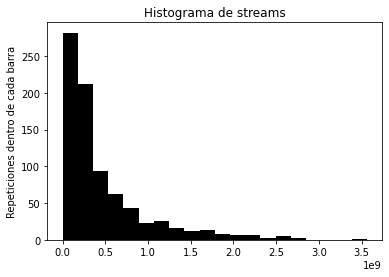

In [216]:
df_sin_na_prueba = pd.to_numeric(df_sin_na["streams"],errors="coerce")
df_sin_na_prueba

N, bins, patches = plt.hist(df_sin_na_prueba, bins = 20,color="black") # Output de la función plt.hist


plt.ylabel("Repeticiones dentro de cada barra")
plt.title("Histograma de streams")

    
plt.show()

artist_count
4    1.561088e+59
5    1.355641e+33
6    6.825921e+14
8    1.231224e+08
Name: streams, dtype: float64


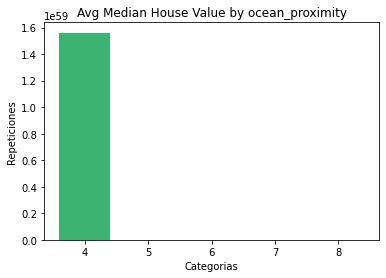

In [268]:
df_sin_na_reduced = df.iloc[:500]
df_sin_na_reduced
df_sin_na_reduced_visual = df_sin_na_reduced.groupby("artist_count")["streams"].mean() #Obtener información agrupada por variedad
visual_df = df_sin_na_reduced_visual[3:]
print(visual_df)

plt.bar(list(visual_df.index),list(visual_df),color = "mediumseagreen", align = "center")
plt.xlabel("Categorias")
plt.ylabel("Repeticiones")
plt.title("Avg Median House Value by ocean_proximity")
plt.show()

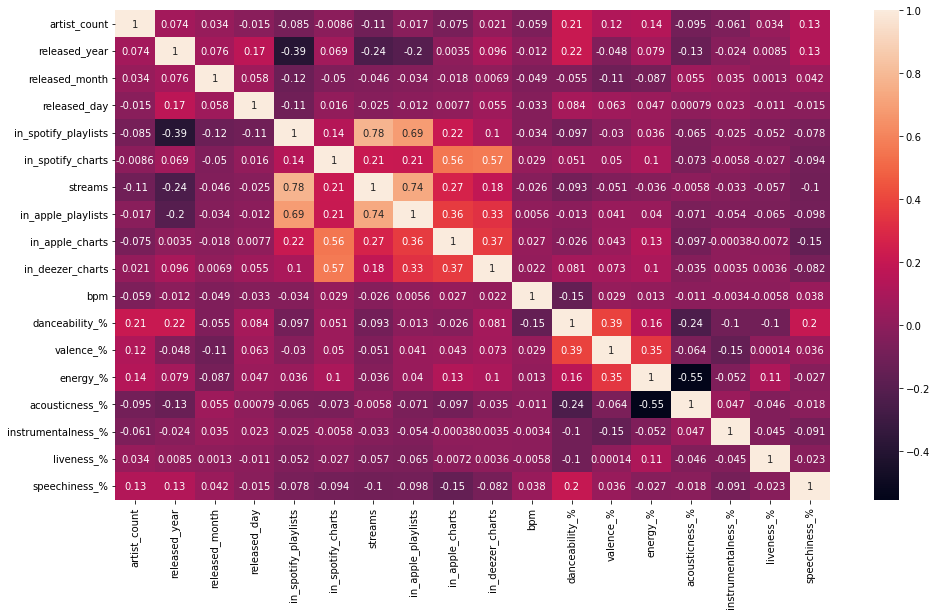

In [277]:

import seaborn as sns
plt.figure(figsize = (16,9))
ax = sns.heatmap(df_sin_na.corr(), annot=True)
#Nos fijamos en esta matrix en la fila de streams

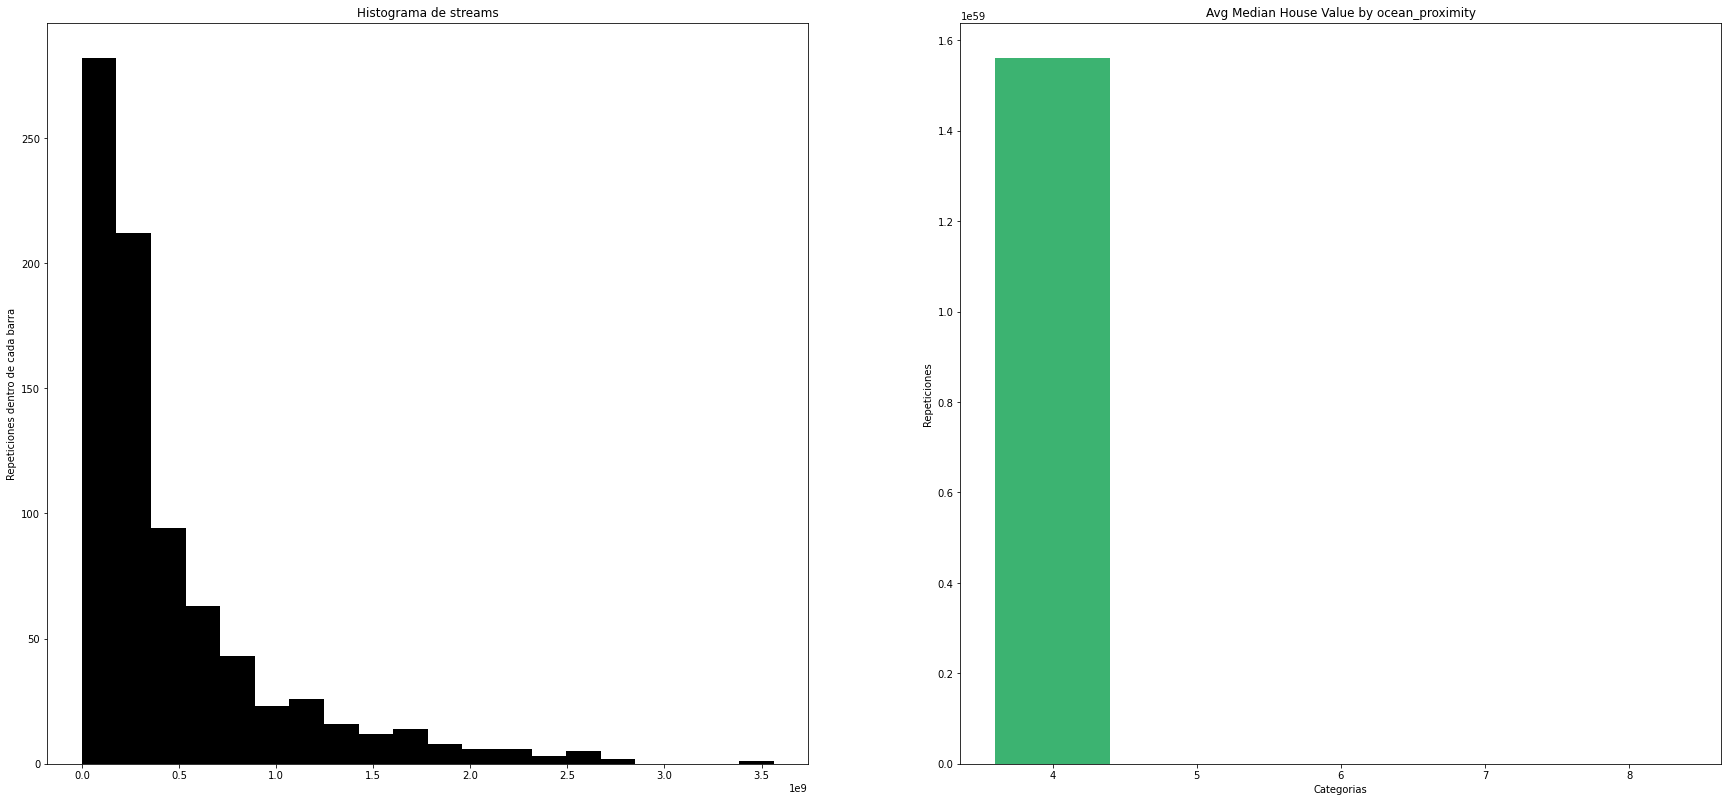

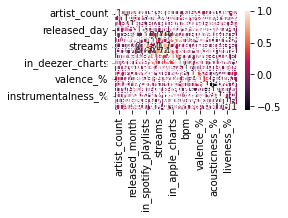

In [279]:
plt.figure(figsize = (30,30))

# Primera figura (arriba izquierda)
plt.subplot(2,2,1) # Numero de filas, Numero de columnas, Numero de figura
df_sin_na_prueba = pd.to_numeric(df_sin_na["streams"],errors="coerce")
df_sin_na_prueba
N, bins, patches = plt.hist(df_sin_na_prueba, bins = 20,color="black") # Output de la función plt.hist
plt.ylabel("Repeticiones dentro de cada barra")
plt.title("Histograma de streams")


#Segunda figura (arriba derecha)
plt.subplot(2,2,2)
plt.bar(list(visual_df.index),list(visual_df),color = "mediumseagreen", align = "center")
plt.xlabel("Categorias")
plt.ylabel("Repeticiones")
plt.title("Avg Median House Value by ocean_proximity")
plt.show()


#Tercera figura (abajo izquierda)
plt.subplot(2,2,3)
ax = sns.heatmap(df_sin_na.corr(), annot=True)


# Cuarta figura (abajo derecha)





####
plt.show()